# 💼 Employee Salary Prediction using Machine Learning

This project predicts employee salaries using a Linear Regression model trained on real-world data.

### 📊 Features Used:
- Experience (in years)
- Age
- Education Level
- Job Title
- Industry
- City

🔮 Try it yourself by entering age, experience, education, job title, industry, and city — and get an instant predicted salary!




In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
import pickle
import os

In [9]:
# Load the data
data = pd.read_csv("data/employee_salaries_india_updated.csv")
data.head()

,Name,Age,Gender,Education,Experience,Job_Title,City,Industry,Salary (INR),Marital_Status
0,Yakshit Bandi,57,Male,Bachelor,9,UI/UX Designer,Pune,Manufacturing,656192,Married
1,Jayesh Buch,42,Male,PhD,16,DevOps Engineer,Chennai,Telecom,1234761,Married
2,Yuvaan Sodhi,25,Other,Master,0,Web Developer,Mumbai,Manufacturing,615420,Married
3,Emir Thakkar,41,Other,Bachelor,16,DevOps Engineer,Delhi,Manufacturing,831291,Single
4,Taimur Wali,40,Other,PhD,13,Data Scientist,Bangalore,Retail,1233217,Married


In [10]:
# Feature selection
X = data[['Experience', 'Age', 'Education', 'Job_Title', 'Industry', 'City']]
y = data['Salary (INR)']


In [11]:
# One-hot encode categorical features
X_encoded = pd.get_dummies(X, columns=['Education', 'Job_Title', 'Industry', 'City'])


In [12]:
# Split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Train model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"R² Score: {r2:.2f}")
print(f"Mean Absolute Error: ₹{mae:.2f}")



R² Score: 0.98
Mean Absolute Error: ₹34319.18


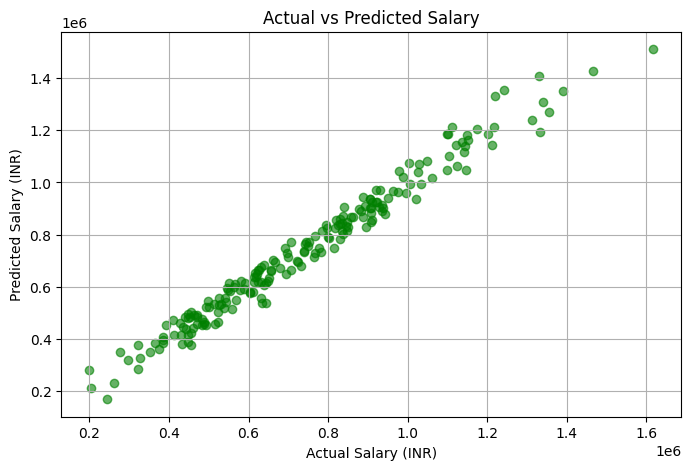

In [13]:
# Plot
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred, color='green', alpha=0.6)
plt.xlabel("Actual Salary (INR)")
plt.ylabel("Predicted Salary (INR)")
plt.title("Actual vs Predicted Salary")
plt.grid(True)
plt.show()

In [14]:
import os
import pickle

# Save model
os.makedirs("model", exist_ok=True)
with open("model/salary_model.pkl", "wb") as f:
    pickle.dump(model, f)
